In [2]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Pandas = Panel Data
Pandas documentation: https://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 100-pandas-puzzles

**https://github.com/FIIT-IAU/100-pandas-puzzles** (forked from https://github.com/ajcr/100-pandas-puzzles)


# Úlohy

V tejto časti váš čaká random dataset záznamov hrania hier. Jeden záznam pozozstáva [id_hráča, názov hry] ,ktorý nám hovorí, že hráč s id id_hráča sputil (v nejakom čase) danú hru.

In [2]:
hry = ["AssassinsCreed", "Borderlands", "Crysis", "Doom", "Witcher"]
data = pd.DataFrame({"Hrac" : np.random.randint(5, size=(1, 20))[0],
                    "Hra" : np.random.choice(hry, size=(1, 20))[0]})              
data

,Hrac,Hra
0,3,Crysis
1,3,Doom
2,0,Doom
3,2,Doom
4,3,Crysis
5,2,Borderlands
6,4,Doom
7,3,Crysis
8,2,Doom
9,0,Doom


Vašou úlohou je teraz vyfiltrovať iba hráčov, ktorí hrali Crysis. Akceptovaný je iba príkaz na jeden riadok.

In [5]:
# Miesto pre váš kód
data[data["Hra"] == "Crysis"]

,Hrac,Hra
1,1,Crysis
5,1,Crysis
10,1,Crysis


Teraz z pôvodných dát (Dataframe 'data') spočítajte koľko hráčov hralo jednotlivú hru (pre každú hru počet hráčov). Opäť sa akceptuje len jednoriadkový príkaz.

In [6]:
# Miesto pre váš kód
data.groupby("Hra").count()

,Hrac
Hra,
AssassinsCreed,3
Borderlands,6
Crysis,3
Doom,2
Witcher,6


Chcem sa pozrieť na jednotlivých hráčov, koľko krát hrali danú hru. Vytvorte novú tabuľku, kde riadky budú hráči, stĺpce budú hry a záznamy budú počty spustení hry hráčom.

In [25]:
# Miesto pre váš kód
pd.crosstab(data["Hrac"], data["Hra"])

#Alter riesenie
data.pivot_table(index="Hrac", columns="Hra", aggfunc=np.count_nonzero, fill_value=0)


Hra,AssassinsCreed,Borderlands,Crysis,Doom,Witcher
Hrac,,,,,
0,0,1,0,2,0
1,4,2,0,2,2
2,0,2,0,4,2
3,2,0,8,2,0
4,0,0,2,2,0


## Koronavírus!

V tejto úlohe máte priravené dve série dát. Prvá sú počet vykonaných testov a druhá počet denných prírastkov pozitívne testovaných osôb na Slovensku od 6. 3. 2020 so 26. 9. 2020. Vašou úlohou je teraz tieto dve série zobraziť na jednom grafe.

In [8]:
testy = pd.Series([378, 66, 76, 69, 111, 97, 95, 58, 197, 289, 159, 318, 225, 301, 368, 440, 242, 451, 476, 335, 913, 747, 720, 401, 688, 877, 1191, 1454, 1889, 1524, 1036, 1448, 2042, 1690, 2301, 2174, 1580, 1324, 1302, 1439, 2967, 3351, 3144, 3323, 2458, 2694, 3468, 4525, 3840, 4828, 4839, 3171, 1767, 5472, 4584, 5150, 3698, 1450, 1584, 2060, 4742, 5161, 4694, 3910, 1488, 786, 2063, 4326, 4876, 3992, 4084, 2476, 971, 2041, 3371, 2933, 2751, 2236, 1649, 645, 1464, 2839, 2352, 1848, 3433, 1606, 274, 6418, 2336, 2135, 1832, 2639, 1180, 160, 851, 1545, 1500, 1262, 1511, 479, 47, 847, 1163, 787, 806, 1278, 301, 41, 661, 1257, 936, 1515, 1611, 931, 62, 784, 2063, 1708, 1801, 2216, 808, 50, 873, 2225, 2284, 2172, 2879, 960, 279, 1163, 2205, 2336, 1862, 2161, 410, 24, 3333, 2571, 2251, 2049, 2275, 767, 216, 1548, 2296, 1851, 2176, 2884, 585, 766, 1320, 2538, 2667, 2473, 3099, 1068, 564, 1454, 3131, 2741, 2738, 3235, 2013, 481, 1583, 3684, 3435, 3245, 3833, 1723, 929, 2103, 4090, 3636, 4360, 4453, 1951, 588, 2763, 2428, 3519, 4772, 5947, 2462, 922, 2891, 5309, 5021, 4266, 6191, 3080, 1425, 4323, 3235, 4027, 5542, 5750, 3443, 1952, 2664, 6231, 5213, 5540, 6483, 5655])
prirastky = pd.Series([1, 2, 2, 2, 0, 3, 11, 11, 12, 17, 11, 24, 8, 19, 14, 41, 7, 19, 12, 10, 43, 23, 22, 22, 27, 37, 26, 24, 21, 14, 49, 47, 101, 19, 14, 13, 14, 27, 66, 28, 114, 72, 40, 72, 12, 26, 45, 81, 35, 13, 6, 2, 3, 7, 5, 7, 4, 1, 5, 8, 8, 16, 10, 0, 2, 0, 8, 4, 8, 3, 13, 1, 1, 0, 1, 6, 1, 1, 5, 2, 2, 2, 5, 0, 1, 0, 1, 0, 3, 1, 0, 2, 0, 2, 1, 2, 8, 1, 3, 3, 4, 0, 9, 1, 14, 10, 1, 1, 1, 18, 23, 13, 14, 7, 1, 2, 20, 13, 20, 29, 15, 1, 2, 31, 53, 19, 23, 8, 1, 6, 19, 24, 14, 11, 3, 1, 41, 37, 31, 29, 23, 38, 2, 23, 41, 20, 27, 45, 7, 10, 14, 49, 63, 43, 43, 30, 3, 16, 75, 49, 62, 54, 47, 5, 15, 100, 80, 123, 91, 40, 68, 28, 84, 90, 102, 114, 34, 41, 72, 53, 121, 137, 226, 88, 22, 91, 161, 178, 186, 201, 79, 48, 188, 92, 161, 235, 290, 131, 79, 175, 338, 360, 419, 552, 478])

<AxesSubplot: >

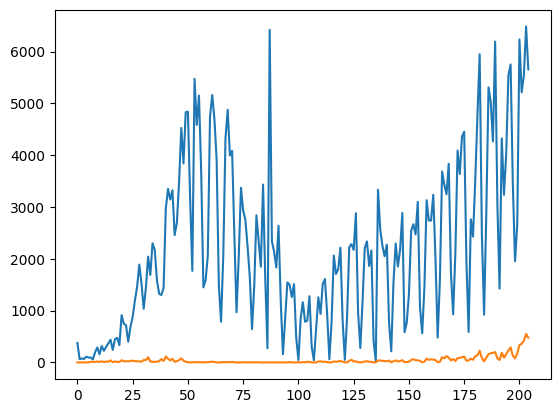

In [9]:
# Miesto pre váš kód
plt.figure()
testy.plot()
prirastky.plot()
